In [2]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [3]:
!pwd

/home/fll_data_bata/code/Franloplam


In [4]:
cats_db = os.path.join(os.getcwd(),"DB Gatos")
cats_db

'/home/fll_data_bata/code/Franloplam/DB Gatos'

In [5]:
dataset_path = os.path.join(cats_db,"dataset","dataset")
dataset_path

'/home/fll_data_bata/code/Franloplam/DB Gatos/dataset/dataset'

In [6]:
os.listdir(dataset_path)

['F_MAT01_EU_FN_RIT01_301.wav',
 'I_BLE01_EU_FN_DEL01_207.wav',
 'F_IND01_EU_FN_ELI01_203.wav',
 'I_MEG01_MC_FI_SIM01_104.wav',
 'F_IND01_EU_FN_ELI01_301.wav',
 'I_SPI01_EU_MN_NAI01_302.wav',
 'I_BRA01_MC_MN_SIM01_102.wav',
 'I_MAT01_EU_FN_RIT01_201.wav',
 'F_BRI01_MC_FI_SIM01_201.wav',
 'B_MAT01_EU_FN_RIT01_206.wav',
 'F_SPI01_EU_MN_NAI01_103.wav',
 'I_NUL01_MC_MI_SIM01_101.wav',
 'I_BLE01_EU_FN_DEL01_209.wav',
 'I_MAT01_EU_FN_RIT01_210.wav',
 'F_BRA01_MC_MN_SIM01_302.wav',
 'I_WHO01_MC_FI_SIM01_110.wav',
 'I_CAN01_EU_FN_GIA01_211.wav',
 'F_WHO01_MC_FI_SIM01_306.wav',
 'I_DAK01_MC_FN_SIM01_309.wav',
 'I_WHO01_MC_FI_SIM01_105.wav',
 'I_WHO01_MC_FI_SIM01_109.wav',
 'B_MAT01_EU_FN_RIT01_301.wav',
 'I_BAC01_MC_MN_SIM01_103.wav',
 'I_BRA01_MC_MN_SIM01_104.wav',
 'B_CAN01_EU_FN_GIA01_301.wav',
 'I_SPI01_EU_MN_NAI01_304.wav',
 'F_BAC01_MC_MN_SIM01_101.wav',
 'I_BAC01_MC_MN_SIM01_302.wav',
 'I_MAT01_EU_FN_RIT01_207.wav',
 'B_JJX01_MC_FN_SIM01_102.wav',
 'B_JJX01_MC_FN_SIM01_301.wav',
 'B_ANI0

In [7]:
lista = [i.removesuffix(".wav").split("_")[:-1] for i in os.listdir(dataset_path)]
num_1 = [i.removesuffix(".wav").split("_")[-1][0] for i in os.listdir(dataset_path)]
num_2 = [i.removesuffix(".wav").split("_")[-1][1:] for i in os.listdir(dataset_path)]

In [8]:
dataf = {"Path_audios":os.listdir(dataset_path),
        "Necesidad":[i[0] for i in lista],
        "ID_Gato": [i[1] for i in lista],
        "Raza":[i[2] for i in lista],
        "Sexo":[i[3] for i in lista],
        "ID_Dueño":[i[4] for i in lista],
        "Recording_Session":[j for j in num_1],
        "Vocalization_Counter":[j for j in num_2]}

In [9]:
df = pd.DataFrame(dataf)

In [10]:
df = df.sort_values("ID_Gato").reset_index(drop=True)

In [11]:
df

,Path_audios,Necesidad,ID_Gato,Raza,Sexo,ID_Dueño,Recording_Session,Vocalization_Counter
0,B_ANI01_MC_FN_SIM01_303.wav,B,ANI01,MC,FN,SIM01,3,03
1,I_ANI01_MC_FN_SIM01_104.wav,I,ANI01,MC,FN,SIM01,1,04
2,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,1,01
3,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,1,03
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,3,02
...,...,...,...,...,...,...,...,...
435,F_WHO01_MC_FI_SIM01_307.wav,F,WHO01,MC,FI,SIM01,3,07
436,I_WHO01_MC_FI_SIM01_103.wav,I,WHO01,MC,FI,SIM01,1,03
437,B_WHO01_MC_FI_SIM01_202.wav,B,WHO01,MC,FI,SIM01,2,02
438,B_WHO01_MC_FI_SIM01_302.wav,B,WHO01,MC,FI,SIM01,3,02


In [12]:
ruta_primer_audio = os.path.join(dataset_path,df.iloc[0]["Path_audios"])
ruta_primer_audio

'/home/fll_data_bata/code/Franloplam/DB Gatos/dataset/dataset/B_ANI01_MC_FN_SIM01_303.wav'

In [13]:
audio, sr = librosa.load(ruta_primer_audio)
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

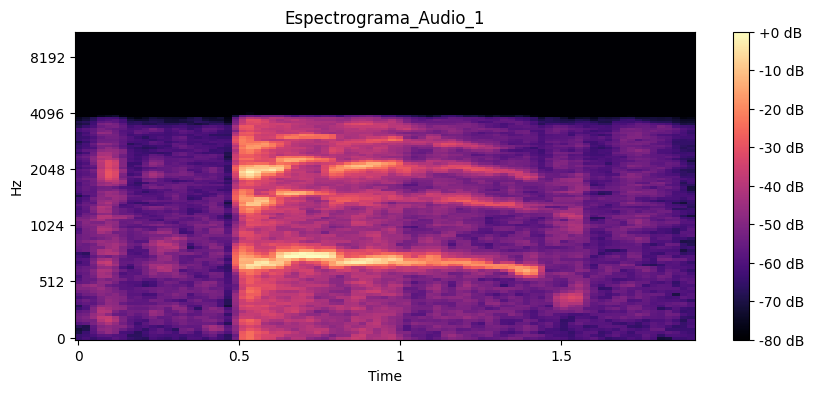

In [14]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma_Audio_1');

In [15]:
spectrogram.shape

(128, 83)

In [16]:
ruta_segundo_audio = os.path.join(dataset_path,df.iloc[22]["Path_audios"])
print(ruta_segundo_audio)
audio, sr = librosa.load(ruta_segundo_audio)
spectrogram2 = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram2.shape

/home/fll_data_bata/code/Franloplam/DB Gatos/dataset/dataset/I_BAC01_MC_MN_SIM10_102.wav


(128, 79)

In [17]:
ruta_tercer_audio = os.path.join(dataset_path,df.iloc[435]["Path_audios"])
print(ruta_tercer_audio)
audio, sr = librosa.load(ruta_tercer_audio)
spectrogram3 = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram3.shape

/home/fll_data_bata/code/Franloplam/DB Gatos/dataset/dataset/F_WHO01_MC_FI_SIM01_307.wav


(128, 62)

----------

In [18]:
spectrogram

array([[4.16185139e-05, 7.95877131e-05, 3.84055056e-05, ...,
        5.46959418e-05, 4.84995253e-05, 6.33112577e-05],
       [3.92203583e-05, 5.72046119e-05, 8.83508474e-05, ...,
        1.09453511e-04, 8.36168256e-05, 6.67213244e-05],
       [1.19871765e-05, 4.37884119e-05, 1.50181586e-04, ...,
        1.52963723e-04, 6.87962238e-05, 4.86089048e-05],
       ...,
       [1.61678351e-08, 4.01778966e-09, 1.08938063e-18, ...,
        1.62168281e-19, 1.04963930e-13, 3.10998796e-11],
       [1.57155586e-08, 3.90522992e-09, 8.23778160e-19, ...,
        2.22679580e-19, 1.03366575e-13, 3.06233268e-11],
       [1.54388555e-08, 3.83641163e-09, 1.01304468e-18, ...,
        1.65111558e-19, 1.02330931e-13, 3.03157707e-11]], dtype=float32)

In [19]:
altura_nueva= 128
ancho_nuevo=128

In [20]:
spectrogram_redimension = ndimage.zoom(spectrogram, (altura_nueva / spectrogram.shape[0], ancho_nuevo / spectrogram.shape[1]))

In [21]:
spectrogram_redimension.shape

(128, 128)

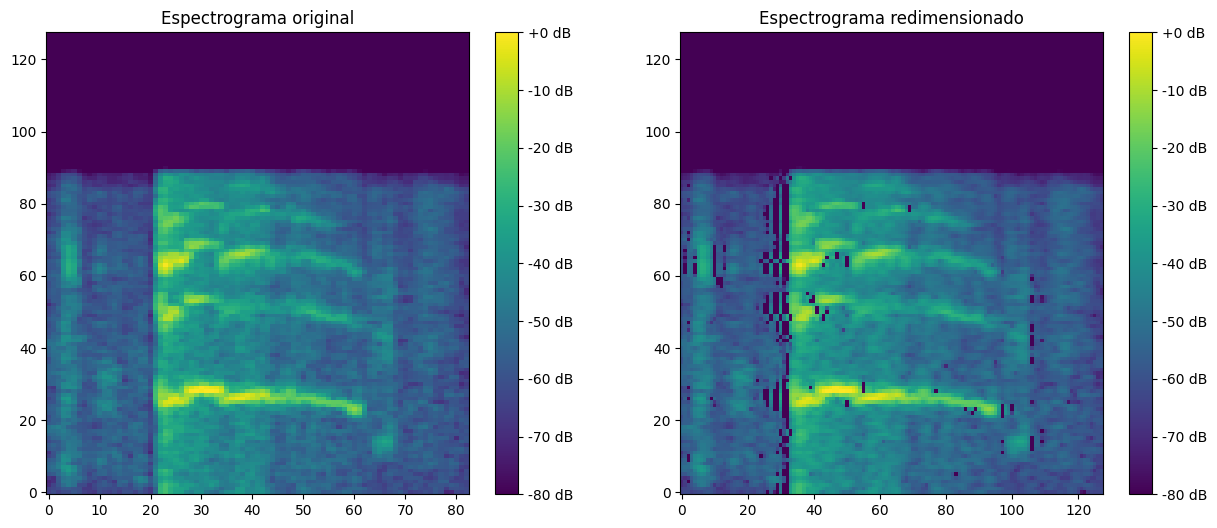

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

im1 = ax[0].imshow(librosa.power_to_db(spectrogram, ref=np.max), aspect='auto', origin='lower', cmap='viridis')
ax[0].set_title('Espectrograma original')
fig.colorbar(im1, ax=ax[0], format='%+2.0f dB')

im2 = ax[1].imshow(librosa.power_to_db(spectrogram_redimension, ref=np.max), aspect='auto', origin='lower', cmap='viridis')
ax[1].set_title('Espectrograma redimensionado')
fig.colorbar(im2, ax=ax[1], format='%+2.0f dB');

In [31]:
dataset_path

'/home/fll_data_bata/code/Franloplam/DB Gatos/dataset/dataset'

In [43]:
del df["Path_audios"]

In [45]:
df = df.rename(columns={"Resized_Audios":"Path_Audios"})

In [46]:
df

,Necesidad,ID_Gato,Raza,Sexo,ID_Dueño,Recording_Session,Vocalization_Counter,Path_Audios
0,B,ANI01,MC,FN,SIM01,3,03,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
1,I,ANI01,MC,FN,SIM01,1,04,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
2,B,ANI01,MC,FN,SIM01,1,01,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
3,B,ANI01,MC,FN,SIM01,1,03,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
4,B,ANI01,MC,FN,SIM01,3,02,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
...,...,...,...,...,...,...,...,...
435,F,WHO01,MC,FI,SIM01,3,07,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
436,I,WHO01,MC,FI,SIM01,1,03,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
437,B,WHO01,MC,FI,SIM01,2,02,/home/fll_data_bata/code/Franloplam/DB Gatos/d...
438,B,WHO01,MC,FI,SIM01,3,02,/home/fll_data_bata/code/Franloplam/DB Gatos/d...


In [26]:
df.value_counts("Necesidad")

Necesidad
I    221
B    127
F     92
dtype: int64